In [1]:
# In this notebook:

# A brief recreation of the SAS data analysis process in Python
# Data is from UCI German Credit data repository

In [ ]:
data_url = 'https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Import Data

In [3]:
gorig = pd.read_csv('gcred.txt', index_col=False)

print (f'Dataset shape: {gorig.shape}')
gorig.head()

Dataset shape: (1000, 21)


,CHK,MONTH,CREDHIST,PURPOSE,CREDAMT,SAVING,EMP,INST,PERSONAL,OTHER,...,PROP,AGE,OTHERINST,HOUSING,CREDNUM,JOB,PPL,TEL,FOREIGN,TARGET
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


0    700
1    300
Name: TARGET, dtype: int64


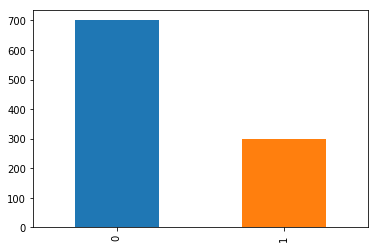

In [4]:
print(gorig.TARGET.value_counts())
gorig.TARGET.value_counts().plot('bar')

In [5]:
gnum = gorig.select_dtypes(['int64'])

gnum.head(2)

,MONTH,CREDAMT,INST,RES,AGE,CREDNUM,PPL,TARGET
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,1


In [6]:
gnum = gnum[['MONTH','CREDAMT','AGE','TARGET']]

gnum.head(2)

,MONTH,CREDAMT,AGE,TARGET
0,6,1169,67,0
1,48,5951,22,1


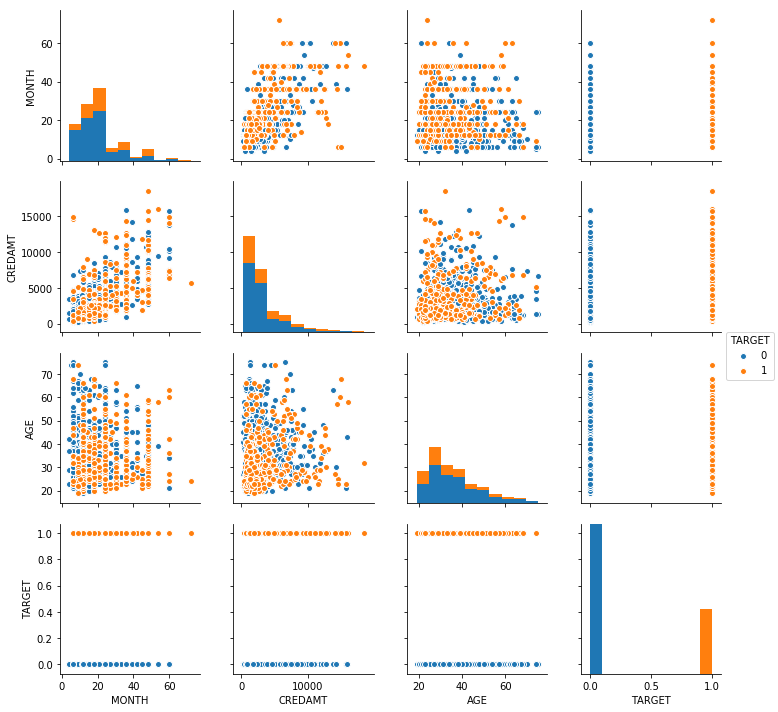

In [7]:
sns.pairplot(gnum, hue='TARGET')

## Remove outliers

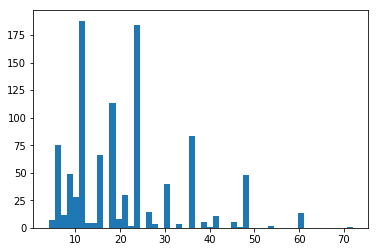

In [8]:
plt.hist(gorig['MONTH'], bins=50)
plt.show()
# 1 outlier > 70

In [9]:
gorig[gorig.MONTH > 70]['MONTH']

677    72
Name: MONTH, dtype: int64

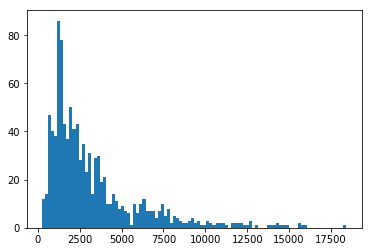

In [10]:
plt.hist(gorig['CREDAMT'], bins=100)
plt.show()
# 1 outlier > 16000

In [11]:
gorig[gorig.CREDAMT > 16000]['CREDAMT']

915    18424
Name: CREDAMT, dtype: int64

In [12]:
gorig['CREDNUM'].value_counts()
# CREDNUM 4 has very few items

1    633
2    333
3     28
4      6
Name: CREDNUM, dtype: int64

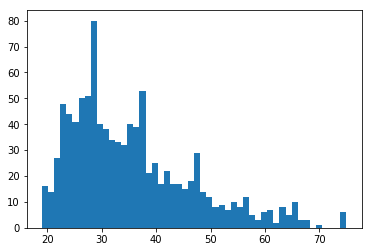

In [13]:
plt.hist(gorig['AGE'], bins=50)
plt.show()
# no need to remove samples

In [14]:
gorig['INST'].value_counts()
# INST well distributed

4    476
2    231
3    157
1    136
Name: INST, dtype: int64

In [15]:
gorig['RES'].value_counts()
# RES well distributed

4    413
2    308
3    149
1    130
Name: RES, dtype: int64

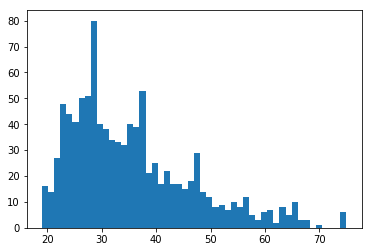

In [16]:
plt.hist(gorig['AGE'], bins=50)
plt.show()
# no need to remove samples

In [17]:
gnum = gorig.select_dtypes(['int64'])

gnum = gnum[(gnum['MONTH'] < 70) & 
            (gnum['CREDAMT'] < 16000) &
            (gnum['CREDNUM'] != 4)]

print(f'Numerical data without outliers: {gnum.shape}')

Numerical data without outliers: (992, 8)


## Create dummy variables

In [18]:
gcat = gorig.select_dtypes(['object'])

gcat.head(2)

,CHK,CREDHIST,PURPOSE,SAVING,EMP,PERSONAL,OTHER,PROP,OTHERINST,HOUSING,JOB,TEL,FOREIGN
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201


In [19]:
for col in gcat.columns:
        print (gcat[col].value_counts())
# visualize outliers for categoric variables
# no outliers to remove

A14    394
A11    274
A12    269
A13     63
Name: CHK, dtype: int64
A32    530
A34    293
A33     88
A31     49
A30     40
Name: CREDHIST, dtype: int64
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: PURPOSE, dtype: int64
A61    603
A65    183
A62    103
A63     63
A64     48
Name: SAVING, dtype: int64
A73    339
A75    253
A74    174
A72    172
A71     62
Name: EMP, dtype: int64
A93    548
A92    310
A94     92
A91     50
Name: PERSONAL, dtype: int64
A101    907
A103     52
A102     41
Name: OTHER, dtype: int64
A123    332
A121    282
A122    232
A124    154
Name: PROP, dtype: int64
A143    814
A141    139
A142     47
Name: OTHERINST, dtype: int64
A152    713
A151    179
A153    108
Name: HOUSING, dtype: int64
A173    630
A172    200
A174    148
A171     22
Name: JOB, dtype: int64
A191    596
A192    404
Name: TEL, dtype: int64
A201    963
A202     37
Name: FOREIGN, dtype: int64


In [20]:
gcat = pd.get_dummies(gcat, drop_first=True)

print (f'Total number of dummy columns: {gcat.shape[1]}')

gcat.head(2)

Total number of dummy columns: 41


,CHK_A12,CHK_A13,CHK_A14,CREDHIST_A31,CREDHIST_A32,CREDHIST_A33,CREDHIST_A34,PURPOSE_A41,PURPOSE_A410,PURPOSE_A42,...,PROP_A124,OTHERINST_A142,OTHERINST_A143,HOUSING_A152,HOUSING_A153,JOB_A172,JOB_A173,JOB_A174,TEL_A192,FOREIGN_A202
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


## Machine Learning

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

In [22]:
gml = pd.concat([gnum.iloc[:,:-1], gcat, gnum.iloc[:,-1]], axis=1, join_axes=[gnum.index])

target = gml.pop('TARGET')

gml.head(2)

,MONTH,CREDAMT,INST,RES,AGE,CREDNUM,PPL,CHK_A12,CHK_A13,CHK_A14,...,PROP_A124,OTHERINST_A142,OTHERINST_A143,HOUSING_A152,HOUSING_A153,JOB_A172,JOB_A173,JOB_A174,TEL_A192,FOREIGN_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [23]:
x_train, x_test, y_train, y_test = train_test_split(gml, target, test_size=0.2)

print(f'{x_train.shape} {x_test.shape} {y_train.shape} {y_test.shape}')

(793, 48) (199, 48) (793,) (199,)


In [24]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [25]:
print(f'Prediction accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%')

Prediction accuracy: 77.89%


## Additional ML

In [26]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[120  11]
 [ 33  35]]


In [27]:
logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False  True False  True  True  True False  True
  True  True  True  True  True  True False False  True  True False False
 False  True  True  True False  True False False  True False  True  True
  True  True  True False  True False  True False  True  True  True  True]
[12 19  1 16 15  1  4  1  1  1  6  1  1  1  1  1  1  1  9  3  1  1 11  7
 14  1  1  1  5  1  8 18  1 13  1  1  1  1  1 17  1  2  1 10  1  1  1  1]


In [28]:
rfe_cols = []

for i in zip(rfe.support_ , gml.columns):
    if i[0] == True:
        rfe_cols.append(i[1])
        
print (f'rfe_cols length: {len(rfe_cols)}\n')
print (rfe_cols)

rfe_cols length: 30

['INST', 'CREDNUM', 'CHK_A12', 'CHK_A13', 'CHK_A14', 'CREDHIST_A32', 'CREDHIST_A33', 'CREDHIST_A34', 'PURPOSE_A41', 'PURPOSE_A410', 'PURPOSE_A42', 'PURPOSE_A43', 'PURPOSE_A46', 'PURPOSE_A48', 'SAVING_A64', 'SAVING_A65', 'EMP_A72', 'EMP_A74', 'PERSONAL_A93', 'OTHER_A102', 'OTHER_A103', 'PROP_A122', 'PROP_A123', 'PROP_A124', 'OTHERINST_A143', 'HOUSING_A153', 'JOB_A173', 'JOB_A174', 'TEL_A192', 'FOREIGN_A202']


In [29]:
grfe = gml[rfe_cols]

x_train, x_test, y_train, y_test = train_test_split(grfe, target, test_size=0.2)

print(f'{x_train.shape} {x_test.shape} {y_train.shape} {y_test.shape}')

(793, 30) (199, 30) (793,) (199,)


In [30]:
logreg = LogisticRegression(C=2.0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print(f'New prediction accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%')
print('New confusion matrix:')
print(cm)
print(classification_report(y_test, y_pred))

New prediction accuracy: 78.39%
New confusion matrix:
[[123  19]
 [ 24  33]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       142
           1       0.63      0.58      0.61        57

   micro avg       0.78      0.78      0.78       199
   macro avg       0.74      0.72      0.73       199
weighted avg       0.78      0.78      0.78       199



In [31]:
# this concludes presentation section